In [1]:
import pandas as pd
import re
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta
import os
import numpy as np

In [2]:
df = pd.read_excel('daily_df.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11982 entries, 0 to 11981
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   num              11982 non-null  int64         
 1   region           11982 non-null  object        
 2   title            11982 non-null  object        
 3   category         11982 non-null  object        
 4   time             11982 non-null  object        
 5   price            11982 non-null  int64         
 6   detail           11972 non-null  object        
 7   interest         11982 non-null  int64         
 8   chat             11982 non-null  int64         
 9   view             11982 non-null  int64         
 10  the_datetime     11982 non-null  datetime64[ns]
 11  the_date         11982 non-null  datetime64[ns]
 12  upload_datetime  11982 non-null  datetime64[ns]
 13  upload_date      11982 non-null  datetime64[ns]
 14  region_gu        11982 non-null  objec

In [3]:
df

,num,region,title,category,time,price,detail,interest,chat,view,the_datetime,the_date,upload_datetime,upload_date,region_gu,reup
0,285844083,강북구 미아동,인삼수삼 선물세트,생활/가공식품,16일 전,20000,지인에게서 선물 받았는데\n제가 열이 많아 내놓습니다.\n현재 냉장 보관중입니다.\...,0,5,276,2021-09-29 10:19:01,2021-09-29,2021-09-13 10:19:01,2021-09-13,강북구,0
1,288832747,강북구 미아동,스팸클래식 1호 선물세트,생활/가공식품,8일 전,40000,추석 선물세트 쇼핑백 있어요~,1,2,503,2021-09-29 10:19:01,2021-09-29,2021-09-21 10:19:01,2021-09-21,강북구,0
2,282622237,강북구 미아동,[미개봉 새상품]사조 해표 선물세트 / 안심특선 s17호,생활/가공식품,끌올 15일 전,30000,사조 해표 선물세트 / 안심특선 s17호\n선물 같은것 많이 받아서 저렴하게 판매합...,2,1,191,2021-09-29 10:19:01,2021-09-29,2021-09-14 10:19:01,2021-09-14,강북구,1
3,285022427,강북구 수유2동,CJ추석선물세트 G호,생활/가공식품,17일 전,25000,추석선물세트 G호구성입니다! \n인터넷 최저 가격보다 저렴하게 올립니다~,0,1,193,2021-09-29 10:19:01,2021-09-29,2021-09-12 10:19:01,2021-09-12,강북구,0
4,221680480,강북구 수유2동,레이져 블랙샤크V2 헤드셋,게임/취미,끌올 18시간 전,80000,선물 받아서 테스트만 해봤습니다.\n기스 1도없고 풀세트 입니다,3,3,170,2021-09-29 10:19:01,2021-09-29,2021-09-28 16:19:01,2021-09-28,강북구,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11977,286765695,중랑구 신내1동,흑화고(버섯) 선물세트 판매,생활/가공식품,끌올 13일 전,57000,아래 링크랑 같은 제품이고\n이번에 선물이 들어왔는데 가족들이 버섯을 좋아하지 않아...,8,5,636,2021-10-04 10:26:06,2021-10-04,2021-09-21 10:26:06,2021-09-21,중랑구,1
11978,290555790,중랑구 면목제2동,선물세트 팝니다 cj n호. 스팸 카놀라유,생활/가공식품,끌올 1일 전,19000,뭐들었나 개봉만했습니다.\n내용물 싸게 구매하실분이 가져가시면 될 것 같습니다.\n...,2,1,88,2021-10-04 10:26:06,2021-10-04,2021-10-03 10:26:06,2021-10-03,중랑구,1
11979,290791867,중랑구 면목동,스팸복합1호 선물세트 새상품,생활/가공식품,끌올 1일 전,18000,스팸복합1호 선물세트 새상품\n선물용으로 좋음\n*유통기한 2023년 3월1일 까지...,9,0,509,2021-10-04 10:26:06,2021-10-04,2021-10-03 10:26:06,2021-10-03,중랑구,1
11980,286745069,중랑구 망우본동,LG엘지 선물세트,생활/가공식품,끌올 16일 전,10000,2024년까지여서 유통기한 넉넉합니다,2,1,304,2021-10-04 10:26:06,2021-10-04,2021-09-18 10:26:06,2021-09-18,중랑구,1


In [4]:
# 수집 날짜 기준 가격 추적 
df.pivot_table(index='num', columns='the_date', values='price').fillna(0).head(20)

the_date,2021-09-29,2021-09-30,2021-10-01,2021-10-03,2021-10-04
num,,,,,
127482010,30000.0,30000.0,30000.0,30000.0,30000.0
127920313,40000.0,40000.0,40000.0,40000.0,40000.0
136926347,0.0,0.0,0.0,23000.0,23000.0
137579805,40000.0,40000.0,40000.0,40000.0,40000.0
146581106,0.0,0.0,40000.0,40000.0,40000.0
152041671,70000.0,70000.0,70000.0,0.0,0.0
153885185,7000.0,7000.0,7000.0,7000.0,7000.0
159969982,20000.0,20000.0,20000.0,20000.0,20000.0
162014732,0.0,12000.0,12000.0,12000.0,12000.0


In [5]:
# 업로드  날짜 기준 가격 추적 
df.pivot_table(index='num', columns='upload_date', values='price').fillna(0).head(40)

upload_date,2021-08-29,2021-08-30,2021-08-31,2021-09-01,2021-09-02,2021-09-03,2021-09-06,2021-09-07,2021-09-08,2021-09-09,...,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04
num,,,,,,,,,,,,,,,,,,,,,
127482010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0
127920313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0
136926347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23000.0,0.0
137579805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146581106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0.0,0.0,0.0
152041671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153885185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159969982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162014732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12000.0,0.0,0.0,0.0,12000.0,0.0,0.0


In [6]:
# 수집 날짜 기준 조회수 추적 
df.pivot_table(index='num', columns='the_date', values='view').fillna(0).head(20)

the_date,2021-09-29,2021-09-30,2021-10-01,2021-10-03,2021-10-04
num,,,,,
127482010,886.0,895.0,899.0,909.0,911.0
127920313,223.0,224.0,224.0,224.0,227.0
136926347,0.0,0.0,0.0,217.0,224.0
137579805,209.0,213.0,214.0,214.0,216.0
146581106,0.0,0.0,940.0,950.0,953.0
152041671,870.0,870.0,870.0,0.0,0.0
153885185,354.0,355.0,356.0,360.0,361.0
159969982,216.0,216.0,219.0,220.0,223.0
162014732,0.0,531.0,535.0,571.0,590.0


In [7]:
# 24시간 내 매물만 봤을 때 
in24hours = df[df.time.str.contains('초|분|시간')]

<AxesSubplot:xlabel='upload_datetime'>

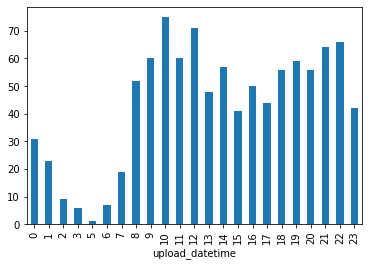

In [8]:
# 24시간 내 시간대별 물량 
in24hours.groupby(in24hours.upload_datetime.dt.hour).title.count().plot.bar()

<AxesSubplot:xlabel='upload_datetime'>

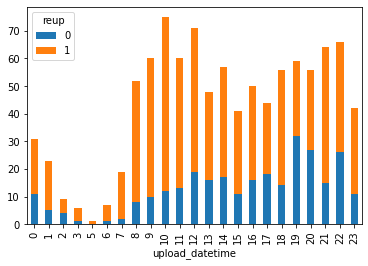

In [9]:
# 24 시간 내 물량 중에서 끌올의 비율 
in24hours.groupby([in24hours.upload_datetime.dt.hour, 'reup']).title.count().unstack().plot(kind='bar', stacked=True)